In [10]:
# enable reload the module
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from tools.mtr_inference import MTRInference
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os


# Interesting case:
1. Val, 6, 2d84b1ab55ab81d3, U-turn vs Left-turn
2. Val, 7, 3505972c220e6b3a, Turn vs Striaght for merging
3. Val, 25, 6d2a107f2e8390a, Merge to main road
4. Val, 26, ae92386e0686d4d6, Complicated 4-way stop
5. Val, 27, 3d00a93f0ba5e294, Both car merge to main road
6. Val, 36, 31d18fac4011375c, illegal merging to the main road

In [12]:
cfg_file = 'tools/cfgs/waymo/bc+10_percent_data.yaml'
ckpt_path = 'output/bc/epoch=2-step=4602.ckpt'

mtr_inference = MTRInference(cfg_file, ckpt_path)

=========== MTR Inference ===========


tensor([[[ 4.6158e-01, -4.0447e-02,  4.9533e-03,  ...,  1.1273e-01,
          -5.6651e-01, -6.4064e-01],
         [ 5.7090e-03, -8.3642e-03, -1.1260e-02,  ..., -5.1517e-01,
          -8.9414e-01, -1.8297e+00],
         [ 1.3688e-01, -9.3973e-02, -2.2151e-01,  ...,  3.1700e-01,
          -1.1535e+00, -5.8990e-01],
         ...,
         [-5.1786e-03,  2.6639e-03, -4.5945e-03,  ..., -6.2169e-01,
          -9.4172e-01, -1.9458e+00],
         [-7.5115e-04, -6.5609e-03, -6.6591e-03,  ..., -5.8212e-01,
          -9.4687e-01, -1.9060e+00],
         [ 1.3792e-02,  2.2391e-03,  8.6724e-04,  ..., -5.8871e-01,
          -9.3918e-01, -1.9039e+00]],

        [[ 2.2233e-01, -1.4318e-02, -2.1557e-02,  ..., -6.0856e-01,
          -8.9441e-01, -1.7594e+00],
         [ 2.3461e-01, -3.2522e-02, -3.3835e-02,  ..., -6.5826e-01,
          -1.0413e+00, -1.9916e+00],
         [ 1.9127e-01,  5.9418e-02, -2.9174e-01,  ...,  1.9166e-01,
          -1.3788e+00, -3.0558e-01],
         ...,
         [ 1.8591e-01, -3

('214dfc443104674a',
 <Figure size 800x800 with 1 Axes>,
 <AxesSubplot: title={'center': 'Scene 214dfc443104674a at 1.0 seconds'}>)

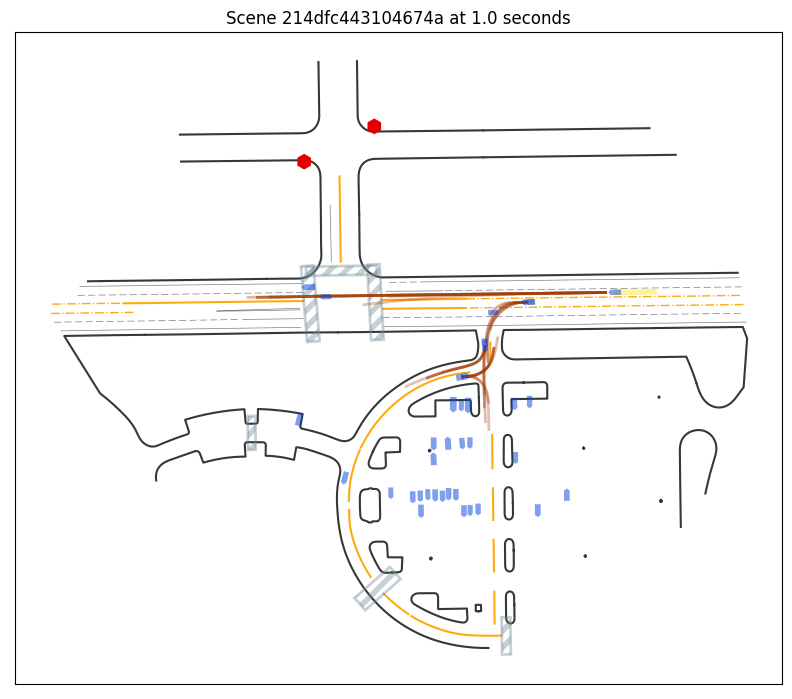

In [35]:

index = 1
scene_id, info = mtr_inference.generate_info(index)
shift = 0 
mtr_inference.visualize(scene_id, info, shift=0)



In [33]:
mtr_inference.visualize(scene_id, info, shift=shift)
shift += 5


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 mtr_inference.visualize(scene_id, info, shift=shift)                                         │
│   2 shift += 5                                                                                   │
│   3                                                                                              │
│                                                                                                  │
│ /home/zixuzhang/Documents/Git/MTR/tools/mtr_inference.py:126 in visualize                        │
│                                                                                                  │
│   123 │   │   '''                                                                                │
│   124 │   │   Get the input data, run inference, and visualize the results.                      │
│   125 │   │   '''                                                                                │
│ ❱ 126 │   │   data = self.dataset.extract_scene_data(scene_id, info, shift)                      │
│   127 │   │                                                                                      │
│   128 │   │   # Make data in a batch with batch size 1                                           │
│   129 │   │   data_batch = self.dataset.collate_batch([data])                                    │
│                                                                                                  │
│ /home/zixuzhang/Documents/Git/MTR/mtr/datasets/waymo/waymo_dataset.py:122 in extract_scene_data  │
│                                                                                                  │
│   119 │   │                                                                                      │
│   120 │   │   # This function extract the current state of the objects that need to be           │
│   121 │   │   # predicted from the all objects' trajectories                                     │
│ ❱ 122 │   │   center_objects, track_index_to_predict = self.get_interested_agents(               │
│   123 │   │   │   track_index_to_predict=track_index_to_predict,                                 │
│   124 │   │   │   obj_trajs_full=obj_trajs_full,                                                 │
│   125 │   │   │   current_time_index=current_time_index,                                         │
│                                                                                                  │
│ /home/zixuzhang/Documents/Git/MTR/mtr/datasets/waymo/waymo_dataset.py:253 in                     │
│ get_interested_agents                                                                            │
│                                                                                                  │
│   250 │   │   │   center_objects_list.append(obj_trajs_full[obj_idx, current_time_index])        │
│   251 │   │   │   track_index_to_predict_selected.append(obj_idx)                                │
│   252 │   │                                                                                      │
│ ❱ 253 │   │   center_objects = np.stack(center_objects_list, axis=0)  # (num_center_objects, n   │
│   254 │   │   track_index_to_predict = np.array(track_index_to_predict_selected)                 │
│   255 │   │   return center_objects, track_index_to_predict                                      │
│   256                                                                                            │
│ in stack:5                                                                                       │
│                                                                                                  │
│ /home/zixuzhang/mambaforge/envs/lpp/lib/python3.9/site-pack